# Ejercicio Formativo 2 Capítulo 3

## Importando librerías

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Creando DataFrame

In [2]:
df = pd.read_csv('data_E2.csv')
display(df.head())

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN


In [3]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

## Codificar columnas categóricas

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
categorical_columns = ['Year', 'Month', 'Day', 'Environmental_risk']
label_encoder = LabelEncoder()

In [6]:
print("Valores únicos antes de la codificación:")
for columna in categorical_columns:
    print(columna, df[columna].unique())

Valores únicos antes de la codificación:
Year [2008 2009 2010 2011 2012 2013 2014 2015 2016]
Month [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Environmental_risk [nan 'medio' 'Bajo' 'extremo' 'Alto' 'nulo']


In [7]:
for columna in categorical_columns:
    df[columna] = label_encoder.fit_transform(df[columna])
df.dtypes

Year                    int64
Month                   int64
Day                     int64
O3                    float64
PM2.5                 float64
Environmental_risk      int32
dtype: object

In [8]:
print("\nValores únicos después de la codificación:")
for columna in categorical_columns:
    print(columna, df[columna].unique())


Valores únicos después de la codificación:
Year [0 1 2 3 4 5 6 7 8]
Month [ 0  1  2  3  4  5  6  7  8  9 10 11]
Day [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Environmental_risk [5 3 1 2 0 4]


In [9]:
df['Environmental_risk'] = df['Environmental_risk'].replace(to_replace=5, value=np.nan)

In [10]:
display(df.head())

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,0,0,0,29.63,NaN,NaN
1,0,0,1,21.46,NaN,NaN
2,0,0,2,24.25,NaN,NaN
3,0,0,3,29.04,NaN,NaN
4,0,0,4,30.17,NaN,NaN


In [11]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

## Misión 1: Predicción de variables numéricas

Se utilizan solo los registros que no tengan valores faltantes para las columnas Year, Month, Day, O3 y PM2.5. Para realizar esto se utiliza `dropna()`. La cual elimina las filas que tengan valores faltantes en las columnas especificadas en el argumento `subset`.

In [12]:
df_filtered_m1 = df.dropna(subset=['Year', 'Month', 'Day', 'O3', 'PM2.5'])
df_filtered_m1.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

Se nos solicita construir al menos dos modelos predictivos que permitan inferir el valor de la variable PM2.5 en base a las otras variables recien indicadas

En primer lugar, se importan las bibliotecas necesarias para realizar el ejercicio.

In [14]:
from sklearn.model_selection import train_test_split

Se crean los sets de entrenamiento y prueba. Se utiliza el método `train_test_split` de la biblioteca `sklearn.model_selection` para dividir el set de datos en dos partes, una para entrenamiento y otra para prueba. Se utiliza el argumento `test_size` para indicar el tamaño del set de prueba.

In [15]:
training_set, test_set = train_test_split(df_filtered_m1.copy(), test_size = 0.3)

print(f'Tamaño set entrenamiento: {len(training_set)}')
print(f'Tamaño set test: {len(test_set)}')

Tamaño set entrenamiento: 1859
Tamaño set test: 797


Ahora se normalizan las columnas numéricas. Se utiliza el método `fit_transform` de la clase `StandardScaler` de la biblioteca `sklearn.preprocessing`. Lo que hace es calcular la media y la desviación estándar de las columnas y luego normaliza los valores de las columnas restando la media y dividiendo por la desviación estándar.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
features = ['O3', 'PM2.5']
training_set[features] = scaler.fit_transform(training_set[features])
test_set[features] = scaler.transform(test_set[features])

training_set.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
824,2,3,3,1.535744,0.099398,3.0
1059,2,10,24,0.813613,-0.480222,3.0
997,2,8,23,0.477596,-0.425936,3.0
905,2,5,23,-0.408266,-0.466085,3.0
2247,6,1,24,0.725638,-0.798024,1.0


Para generalizar lo solicitado se creará una función que permita realizar la predicción de la variable PM2.5 en base a las otras variables e indicará el error cuadrático que obtuvo.

In [18]:
from sklearn import metrics

In [19]:
def training_and_eval(model, training, eval, features, target):
    model.fit(training[features], training[target])
    predictions = model.predict(eval[features])
    mse = metrics.mean_squared_error(eval[target], predictions)
    mae = metrics.mean_absolute_error(eval[target], predictions)
    mape = metrics.mean_absolute_percentage_error(eval[target], predictions)
    print(f'Error cuadrático medio: {mse}')
    print(f'Error absoluto medio: {mae}')
    print(f'Error porcentual absoluto medio: {mape}')

Defino las columnas que se utilizarán para la predicción.

In [20]:
features_columns = ['Year', 'Month', 'Day', 'O3']
target = 'PM2.5'

### Modelo 1: Regresión Lineal

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_1 = LinearRegression()
training_and_eval(model_1, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.7661476264634652
Error absoluto medio: 0.6629854689107194
Error porcentual absoluto medio: 2.1473644597035992


### Modelo 2: Árbol de decisión

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model_2 = DecisionTreeRegressor()
training_and_eval(model_2, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.9501748087704162
Error absoluto medio: 0.6505378479660902
Error porcentual absoluto medio: 3.193407833434994


### Modelo 3: Support Vector Regression (SVR)

In [25]:
from sklearn.svm import SVR

In [26]:
model_3 = SVR()
training_and_eval(model_3, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.6536558023651746
Error absoluto medio: 0.570702228703462
Error porcentual absoluto medio: 1.7275629319857397


### Modelo 4: Redes Neuronales

In [27]:
from sklearn.neural_network import MLPRegressor

In [28]:
model_4 = MLPRegressor()
training_and_eval(model_4, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.5612907215939197
Error absoluto medio: 0.5282094877667401
Error porcentual absoluto medio: 2.2223872646798175


c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo de Redes Neuronales tiene mejor rendimiento dado que sus errores son menores que el de los otros modelos. Se utilizará este modelo para realizar la predicción de la variable PM2.5.

Primero se verá la cantidad de datos faltantes en la columna PM2.5.

In [29]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                 259
Environmental_risk    328
dtype: int64

In [30]:
df['PM2.5'] = df.apply(
    lambda row: (
        model_4.predict([row[features_columns]])[0]
        if pd.isnull(row['PM2.5'])
        and not pd.isnull(row['Year'])
        and not pd.isnull(row['Month'])
        and not pd.isnull(row['Day'])
        and not pd.isnull(row['O3'])
        else row['PM2.5']
    ),
    axis=1
)


c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feat

In [31]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                  37
Environmental_risk    328
dtype: int64

Aún hay valores faltantes en la columna PM2.5, esto debido a que no se pudo predecir dado que había valores faltantes en alguna de las columnas que se utilizaron para la predicción.

## Misión 2: Predicción de variables numéricas parte 2

Se nos solicita repetir el procedimiento de la misión anterior, esta vez para completar los valores de la columna O3. Al igual que en la misión anterior, se utilizarán los registros que no tengan valores faltantes en las columnas Year, Month, Day, O3 y PM2.5.

In [32]:
df_filtered_m2 = df.dropna(subset=['Year', 'Month', 'Day', 'O3', 'PM2.5'])
df_filtered_m2.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    222
dtype: int64

Se crea nuevamente el set de entrenamiento, prueba y validación.

In [33]:
training_set, test_set = train_test_split(df_filtered_m2.copy(), test_size = 0.3)

print(f'Tamaño set entrenamiento: {len(training_set)}')
print(f'Tamaño set test: {len(test_set)}')

Tamaño set entrenamiento: 2014
Tamaño set test: 864


Se normalizan las columnas numéricas.

In [34]:
scaler = StandardScaler()
features = ['O3', 'PM2.5']
training_set[features] = scaler.fit_transform(training_set[features])
test_set[features] = scaler.transform(test_set[features])

training_set.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
1199,3,3,13,-1.288534,-0.356796,3.0
1767,4,10,1,1.076205,-0.663086,1.0
1120,3,0,24,0.638567,-0.352459,4.0
618,1,8,9,0.270553,0.259578,3.0
1719,4,8,14,2.890167,-0.730849,2.0


Dado que se evaluará el rendimiento usando el error cuadrático medio, la función que se creó en la misión anterior se puede reutilizar.	Por ende lo único que se hará en esta parte será cambiar la columna a predecir y se utilizarán los nuevos sets de entrenamiento y prueba.

In [35]:
features_columns = ['Year', 'Month', 'Day', 'PM2.5']
target = 'O3'

### Modelo 1: Regresión Lineal

In [36]:
model_1 = LinearRegression()
training_and_eval(model_1, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.7324606788844422
Error absoluto medio: 0.6907580204625832
Error porcentual absoluto medio: 1.9318067286091303


### Modelo 2: Árbol de decisión

In [37]:
model_2 = DecisionTreeRegressor()
training_and_eval(model_2, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.48709854126402036
Error absoluto medio: 0.4919360014513598
Error porcentual absoluto medio: 1.9282669535256403


### Modelo 3: Support Vector Regression (SVR)

In [38]:
model_3 = SVR()
training_and_eval(model_3, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.398169568793271
Error absoluto medio: 0.5048103159030946
Error porcentual absoluto medio: 2.216431736175148


### Modelo 4: Redes Neuronales

In [39]:
model_4 = MLPRegressor()
training_and_eval(model_4, training_set, test_set, features_columns, target)

Error cuadrático medio: 0.2918566116749169
Error absoluto medio: 0.4229696990570232
Error porcentual absoluto medio: 1.9642645393113474


c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo de Redes Neuronales tiene mejor rendimiento dado que sus errores son menores que el de los otros modelos. Se utilizará este modelo para realizar la predicción de la variable O3.

Primero se verá la cantidad de datos faltantes en la columna O3.

In [40]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                    106
PM2.5                  37
Environmental_risk    328
dtype: int64

In [41]:
df['O3'] = df.apply(
    lambda row: (
        model_4.predict([row[features_columns]])[0]
        if pd.isnull(row['O3'])
        and not pd.isnull(row['Year'])
        and not pd.isnull(row['Month'])
        and not pd.isnull(row['Day'])
        and not pd.isnull(row['PM2.5'])
        else row['O3']
    ),
    axis=1
)

c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feat

In [42]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                     37
PM2.5                  37
Environmental_risk    328
dtype: int64

Aún hay valores faltantes en la columna O3, esto debido a que no se pudo predecir dado que había valores faltantes en alguna de las columnas que se utilizaron para la predicción.	

Recordar que al principio del cuaderno se comprobó que las columnas 'Year', 'Month' y 'Day' no tenían valores faltantes.

Lo que pasa es que para predecir los valores faltantes de la columna 'PM2.5' era necesario que existiera un valor en las columnas 'Year', 'Month', 'Day' y 'O3'; por ende las filas en las que se encontraban valores faltantes en alguna de estas columnas no se les pudieron predecir el valor a completar. Y ahora dado que en esas mismas filas se les intenta predecir el valor de 'O3' dado que no se les pudo predecir el valor de 'PM2.5' no se les puede predecir el valor de 'O3'. A fin de cumplir lo solicitado en el enunciado dichas filas se eliminarán. 

In [43]:
df = df.dropna(subset=['O3', 'PM2.5'])

In [44]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    291
dtype: int64

## Misión 3: Predicción de variables categóricas

Se nos solicita entrenar al menos 2 clasificadores para predecir el valor de la variable
Environmental risk, a partir de todas las otras variables

Se filtran los registros que no tengan valores faltantes en la columna 'Environmental risk'.

In [45]:
df_filtered_m3 = df.dropna(subset=['Environmental_risk'])
df_filtered_m3.apply(lambda x: sum(x.isnull()),axis=0)

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

Se crea nuevamente el set de entrenamiento, prueba y validación.

In [46]:
training_set, test_set = train_test_split(df_filtered_m3.copy(), test_size = 0.3)

print(f'Tamaño set entrenamiento: {len(training_set)}')
print(f'Tamaño set test: {len(test_set)}')

Tamaño set entrenamiento: 1859
Tamaño set test: 797


Se normalizan las columnas numéricas.

In [47]:
scaler = StandardScaler()
features = ['O3', 'PM2.5']
training_set[features] = scaler.fit_transform(training_set[features])
test_set[features] = scaler.transform(test_set[features])

training_set.head()

,Year,Month,Day,O3,PM2.5,Environmental_risk
174,0,5,22,-1.714069,2.735895,3.0
1001,2,8,27,-0.356147,-0.856962,1.0
2251,6,2,0,0.032899,-0.938631,1.0
410,1,1,13,1.756174,-0.305985,3.0
1086,2,11,21,0.223681,-0.435390,3.0


Dado que se evaluará el rendimiento usando balanced accuracy se crea una nueva función similar a la anterior pero que retorne la balanced accuracy.

In [48]:
features_columns = ['Year', 'Month', 'Day', 'O3', 'PM2.5']
target = 'Environmental_risk'

In [49]:
def training_and_eval(model, training, eval, features, target):
    model.fit(training[features], training[target])
    predictions = model.predict(eval[features])
    balanced_accuracy = metrics.balanced_accuracy_score(eval[target], predictions)
    print(f'Exactitud balanceada: {balanced_accuracy}')


Modelo 1: Árbol de decisión

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model_1 = DecisionTreeClassifier()
training_and_eval(model_1, training_set, test_set, features_columns, target)

Exactitud balanceada: 0.9721227621483376


Modelo 2: Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model_2 = RandomForestClassifier()
training_and_eval(model_2, training_set, test_set, features_columns, target)

Exactitud balanceada: 1.0


Modelo 3: Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

In [55]:
model_3 = SVC()
training_and_eval(model_3, training_set, test_set, features_columns, target)

Exactitud balanceada: 0.4055985355934205


Modelo 4: Redes Neuronales

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
model_4 = MLPClassifier()
training_and_eval(model_4, training_set, test_set, features_columns, target)

Exactitud balanceada: 0.8783900163490956


c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Como el modelo de Random Forest tiene mejor rendimiento se utilizará este modelo para realizar la predicción de la variable 'Environmental risk'.

Se revisa la cantidad de datos faltantes en la columna 'Environmental risk'.

In [58]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    291
dtype: int64

In [59]:
df['Environmental_risk'] = df.apply(
    lambda row: (
        model_2.predict([row[features_columns]])[0]
        if pd.isnull(row['Environmental_risk'])
        else row['Environmental_risk']
    ),
    axis=1
)

c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Ronaldo Sosa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493:

In [60]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [61]:
display(df.head())

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,0,0,0,29.63,6.306358,0.0
1,0,0,1,21.46,4.550918,0.0
2,0,0,2,24.25,5.106426,0.0
3,0,0,3,29.04,6.086651,0.0
4,0,0,4,30.17,6.297283,0.0


## Misión 5: Análisis Visual

Se importan las librería de reducción de dimensionalidad.

In [62]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Se definen los colores para los puntos de la gráfica, y se obtienen los valores originales de la columna 'Environmental_risk' que fue codificada previamente.

In [63]:
warnings.filterwarnings("ignore", category=FutureWarning)

colors = ["navy", "turquoise", "darkorange", "red", "green"]
target_names = label_encoder.inverse_transform([0, 1, 2, 3, 4])

In [64]:
print(target_names)

['Alto' 'Bajo' 'extremo' 'medio' 'nulo']


### Reducción de Dimensionalidad

#### Análisis con PCA

Se usará el código visto en clases para realizar los distintos análisis, pero se detallará que hace cada parte de este código.

En esta línea de código se crea una instancia de PCA, donde se declará que se desea reducir la dimensionalidad a solo 2 componentes, el método `fit_transform` lo que hace es ajustar el modelo y transformar los datos a estas nuevas dimensiones.

In [65]:
df_copy = df.copy()

In [66]:
display(df_copy)

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,0,0,0,29.63,6.306358,0.0
1,0,0,1,21.46,4.550918,0.0
2,0,0,2,24.25,5.106426,0.0
3,0,0,3,29.04,6.086651,0.0
4,0,0,4,30.17,6.297283,0.0
...,...,...,...,...,...,...
2979,8,1,26,22.93,17.120000,1.0
2980,8,1,27,26.70,15.330000,1.0
2981,8,1,28,24.62,16.960000,1.0
2982,8,2,0,28.86,32.670000,3.0


In [67]:
X_PCA = PCA(n_components=2).fit_transform(df_copy[features_columns])

In [68]:
df_copy.shape

(2947, 6)

In [69]:
X_PCA.shape

(2947, 2)

In [70]:
display(pd.DataFrame(X_PCA, columns=['Componente 1', 'Componente 2']).head())

,Componente 1,Componente 2
0,-23.306517,-14.331636
1,-23.100858,-13.452841
2,-23.197490,-12.411321
3,-23.346356,-11.340133
4,-23.392205,-10.323303


Como se puede ver ambas tienen la misma cantidad de filas pero 'X_PCA' tiene solo 2 columnas.

Recordar que lo que hace `zip` es juntar los elementos de las listas que se le pasan como argumento en una tupla. Por ende se tiene los siguiente:

In [71]:
print(list(zip(colors, [0, 1, 2, 3, 4], target_names)))

[('navy', 0, 'Alto'), ('turquoise', 1, 'Bajo'), ('darkorange', 2, 'extremo'), ('red', 3, 'medio'), ('green', 4, 'nulo')]


También que se puede acceder a los valores de 'X_PCA' haciendo uso de la notación de corchetes, por ejemplo:

In [72]:
print(X_PCA[0])

[-23.30651706 -14.33163582]


Teniendo esto en cuenta, cuando se hace:

In [73]:
print(X_PCA[df_copy['Environmental_risk'] == 1])

[[ -9.65684858   3.20324719]
 [-12.90989106   7.31909631]
 [-10.37631968  11.22909991]
 ...
 [-10.8714456   11.45174989]
 [-13.47697552  12.52958078]
 [-11.39580336  13.48087777]]


Se accede a las filas de 'X_PCA' que comparten los mismos indices que las filas de 'df_copy' que tienen 'Environmental_risk' igual a 1.

Se grafican los resultados:

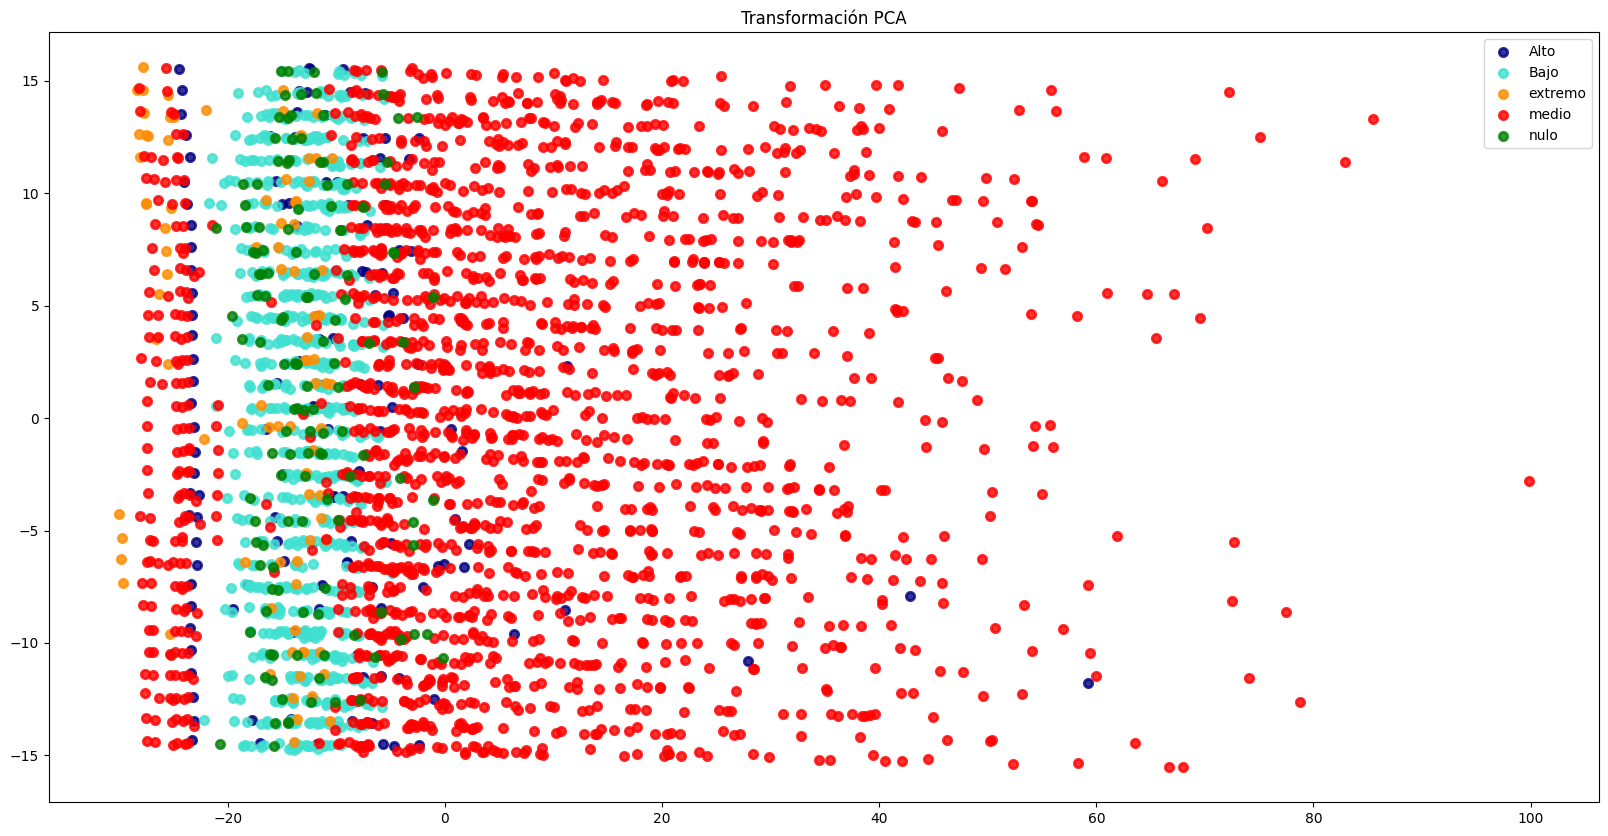

In [74]:
plt.figure(figsize=(20,10))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_PCA[df_copy['Environmental_risk'] == i, 0], X_PCA[df_copy['Environmental_risk'] == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
#plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Transformación PCA")

plt.legend(loc="best", shadow=False, scatterpoints=1);

#### Análisis con TSNE

In [75]:
X_TSNE = TSNE(n_components=2).fit_transform(df_copy[features_columns])

In [76]:
display(pd.DataFrame(X_TSNE, columns=['Componente 1', 'Componente 2']).head())

,Componente 1,Componente 2
0,-51.078785,-22.403866
1,-47.831799,-20.548655
2,-48.983025,-21.174400
3,-51.576302,-22.205387
4,-51.903713,-22.240091


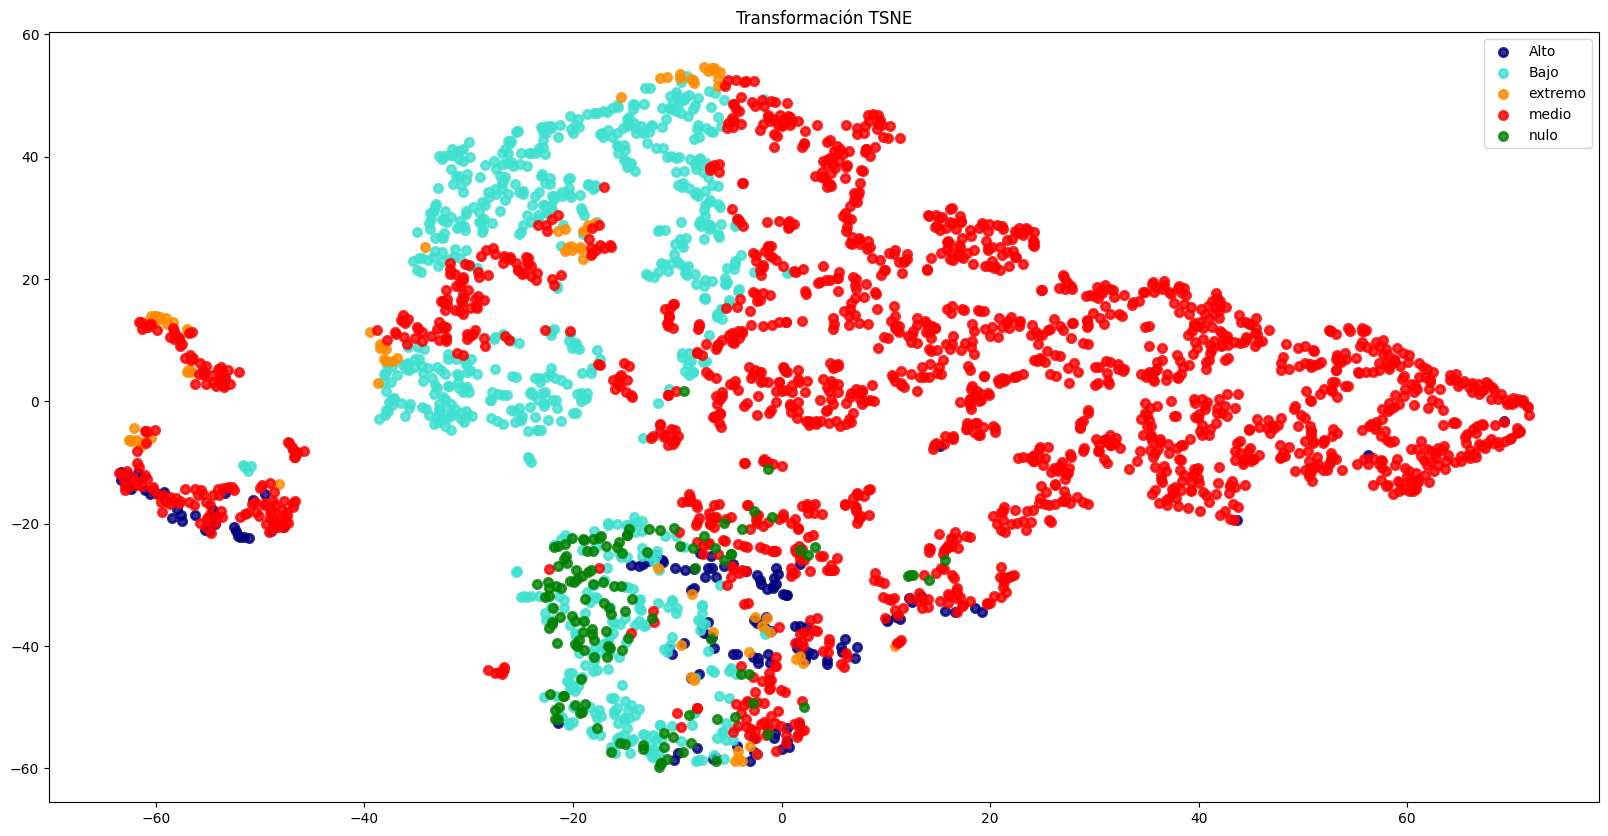

In [77]:
plt.figure(figsize=(20,10))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_TSNE[df_copy['Environmental_risk'] == i, 0], X_TSNE[df_copy['Environmental_risk'] == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
#plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Transformación TSNE")

plt.legend(loc="best", shadow=False, scatterpoints=1);

### Clustering 

#### Analizando con reducción de datos PCA

In [78]:
from sklearn.cluster import KMeans
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_PCA)
    cluster_var.append(kmeans.inertia_)

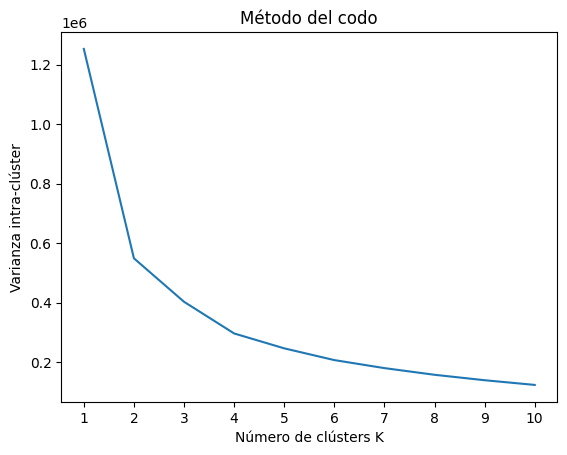

In [79]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [80]:
kmeans = KMeans(n_clusters=4)

kmeans_labels = kmeans.fit_predict(X_PCA)

df_X_PCA = pd.DataFrame(X_PCA, columns=['Componente 1', 'Componente 2'])

df_X_PCA['Environmental_risk'] = df_copy['Environmental_risk']

df_X_PCA['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

In [81]:
display(df_X_PCA.head(10))

,Componente 1,Componente 2,Environmental_risk,Cluster
0,-23.306517,-14.331636,0.0,2
1,-23.100858,-13.452841,0.0,2
2,-23.197490,-12.411321,0.0,2
3,-23.346356,-11.340133,0.0,2
4,-23.392205,-10.323303,0.0,2
5,-23.434647,-9.332793,0.0,2
6,-23.433442,-8.372460,0.0,2
7,-23.398927,-7.394748,0.0,2
8,-22.873533,-6.555270,0.0,2
9,-22.955324,-5.502780,0.0,2


Text(0.5, 1.0, 'Clustering con KMeans')

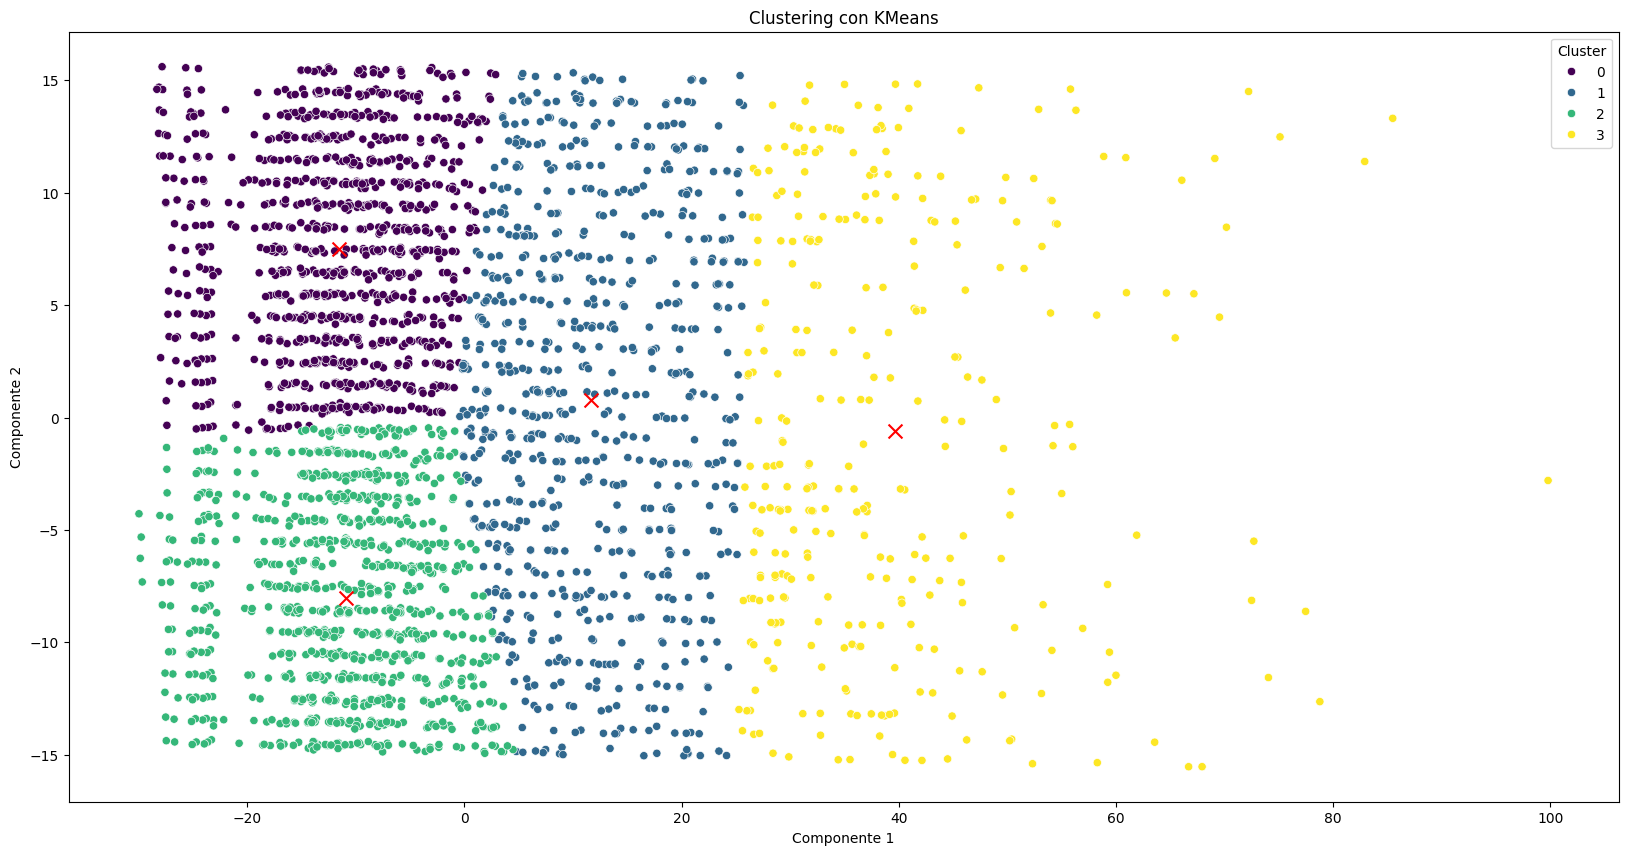

In [82]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_X_PCA, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.title('Clustering con KMeans')

In [83]:
print(list(zip([0, 1, 2, 3, 4], target_names)))

[(0, 'Alto'), (1, 'Bajo'), (2, 'extremo'), (3, 'medio'), (4, 'nulo')]


In [84]:
cluster_stats = df_X_PCA.groupby('Cluster')['Environmental_risk'].value_counts(normalize=True)

print(cluster_stats)

Cluster  Environmental_risk
0        3.0                   0.459086
         1.0                   0.343252
         0.0                   0.091392
         4.0                   0.058448
         2.0                   0.047821
1        3.0                   0.869565
         1.0                   0.115489
         4.0                   0.008152
         0.0                   0.006793
2        3.0                   0.491785
         1.0                   0.336254
         4.0                   0.073384
         0.0                   0.052574
         2.0                   0.046002
3        3.0                   0.950000
         1.0                   0.046875
         4.0                   0.003125
Name: proportion, dtype: float64


#### Analizando con reducción TSNE

In [85]:
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_TSNE)
    cluster_var.append(kmeans.inertia_)

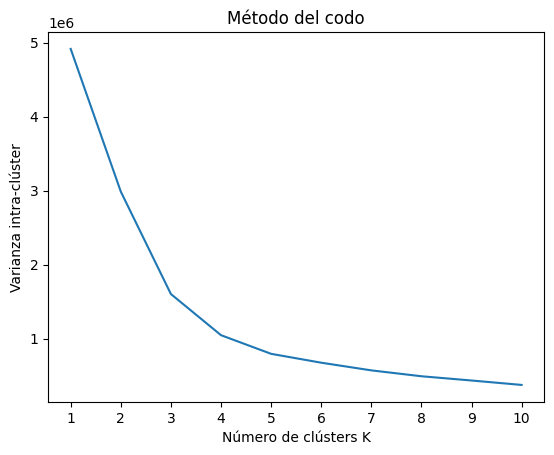

In [86]:
ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [87]:
kmeans = KMeans(n_clusters=5)

kmeans_labels = kmeans.fit_predict(X_TSNE)

df_X_TSNE = pd.DataFrame(X_TSNE, columns=['Componente 1', 'Componente 2'])

df_X_TSNE['Environmental_risk'] = df_copy['Environmental_risk']

df_X_TSNE['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

In [88]:
display(df_X_TSNE.head(10))

,Componente 1,Componente 2,Environmental_risk,Cluster
0,-51.078785,-22.403866,0.0,2
1,-47.831799,-20.548655,0.0,2
2,-48.983025,-21.174400,0.0,2
3,-51.576302,-22.205387,0.0,2
4,-51.903713,-22.240091,0.0,2
5,-52.151279,-22.062811,0.0,2
6,-52.318493,-21.254728,0.0,2
7,-52.501343,-20.525526,0.0,2
8,-49.580433,-15.098358,0.0,2
9,-50.721275,-16.041595,0.0,2


Text(0.5, 1.0, 'Clustering con KMeans')

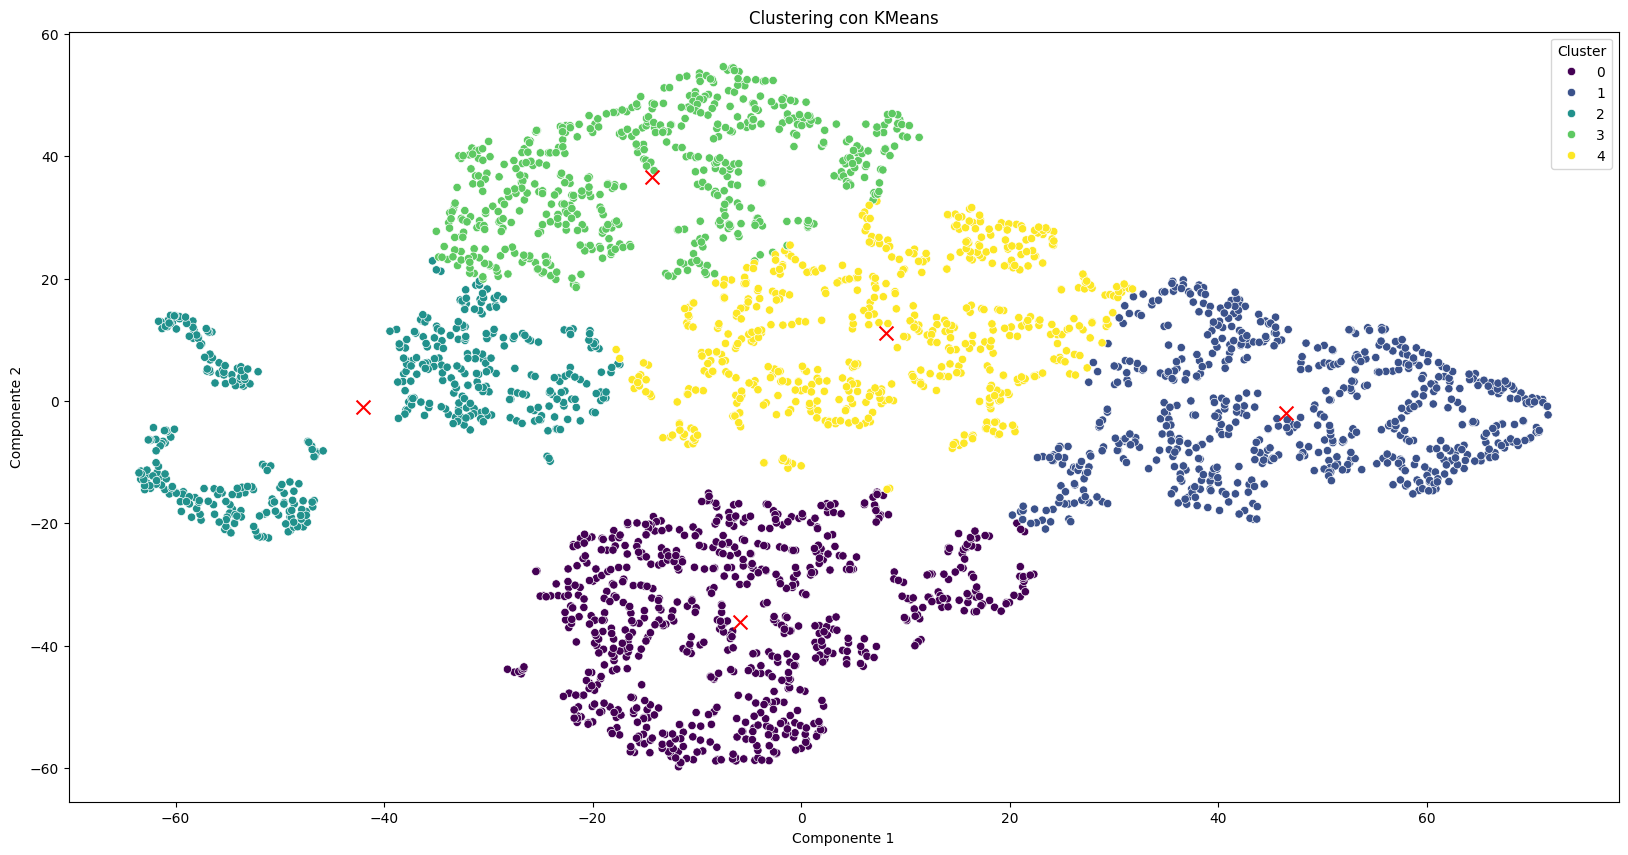

In [89]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_X_TSNE, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

#Colocar titulo
plt.title('Clustering con KMeans')

In [90]:
print(list(zip([0, 1, 2, 3, 4], target_names)))

[(0, 'Alto'), (1, 'Bajo'), (2, 'extremo'), (3, 'medio'), (4, 'nulo')]


In [91]:
cluster_stats = df_X_TSNE.groupby('Cluster')['Environmental_risk'].value_counts(normalize=True)

print(cluster_stats)

Cluster  Environmental_risk
0        3.0                   0.327298
         1.0                   0.311978
         4.0                   0.172702
         0.0                   0.144847
         2.0                   0.043175
1        3.0                   0.948357
         1.0                   0.048513
         0.0                   0.001565
         4.0                   0.001565
2        3.0                   0.537611
         1.0                   0.336283
         0.0                   0.073009
         2.0                   0.053097
3        3.0                   0.503759
         1.0                   0.437970
         2.0                   0.058271
4        3.0                   0.831283
         1.0                   0.158172
         4.0                   0.007030
         0.0                   0.001757
         2.0                   0.001757
Name: proportion, dtype: float64
